# Lab 06: Data Visualization

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as FM
import seaborn as sns
#sns.set(color_codes=True)
sns.set()


In [19]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [9]:
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


# Bar Charts:
## Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
##### You can use the rs dataframe.
##### Please style the chart to make it look nicer with good size and alpha settings. 

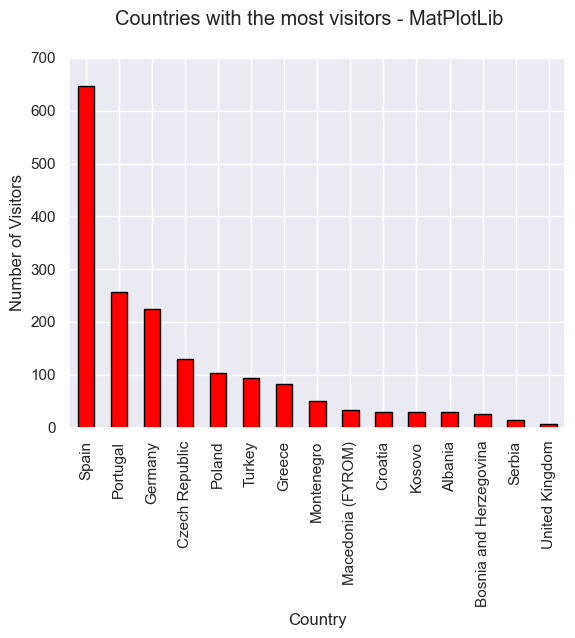

In [11]:
most_visited = df['country'].value_counts()

most_visited.plot(kind = 'bar', color = 'red', edgecolor = 'black')
plt.figure(1, figsize=(10,8), )
plt.suptitle("Countries with the most visitors - MatPlotLib")
plt.xlabel("Country")
plt.ylabel("Number of Visitors")
plt.ylim(0,700)
plt.show()

In [45]:
most_visited_2 = pd.DataFrame(most_visited, index = None)
most_visited_2.head()

,count
country,
Spain,646
Portugal,256
Germany,225
Czech Republic,130
Poland,104


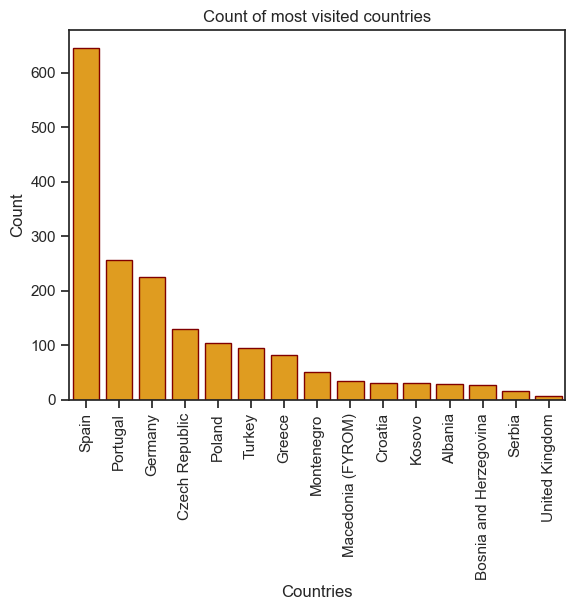

In [53]:
#Q1/Q2 - made bar chart with seaborn and colours are set to orange and maroon for bars and edges, respectively.
sns.set_style("ticks")
ax = sns.barplot(x = 'country' , y = 'count' ,data = most_visited_2, color = 'orange', edgecolor = 'maroon')
ax.set_title("Count of most visited countries")
ax.set_ylabel('Count')
ax.set_xlabel('Countries')
# Here is the method to rotate the tick labels
for item in ax.get_xticklabels():
    item.set_rotation(90)

# Show the plot
plt.show()

# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
##### You can use the rs dataframe.
##### Please style the chart to make it look nicer with good size and alpha settings. 

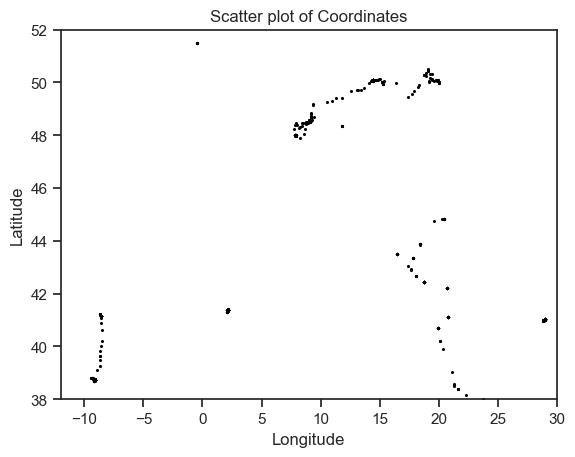

In [89]:
#MatplotLib
df.columns
plt.scatter(df['lon'], df['lat'], color='g', alpha=1, edgecolor='black', s=1.5)

plt.title('Scatter plot of Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-12,30)
plt.ylim(38,52)
plt.show()

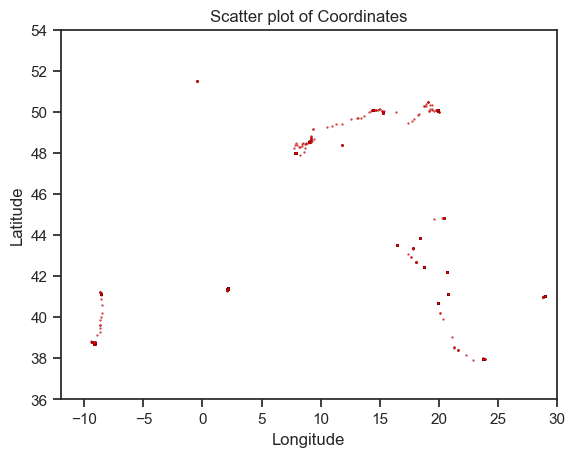

In [105]:
# Seaborn
ax = sns.scatterplot(x = 'lon',y ='lat', data = df, color = 'red', edgecolor = 'black', alpha = 0.8, s= 2 )
ax.set_title("Scatter plot of Coordinates")
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_xlim((-12,30))
ax.set_ylim((36, 54))


plt.show()

# Line charts, with annotation

### Q4: Draw a  matplotlib and seaborn line chart from countdata. 
### Please style the chart to make it look nicer with good size and alpha settings. 

In [177]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata = pd.DataFrame(countdata)
#countdata.rename(columns={'0': 'X'}) 
countdata.head()


,0
2014-05-14,36
2014-05-15,61
2014-05-16,57
2014-05-17,64
2014-05-18,50


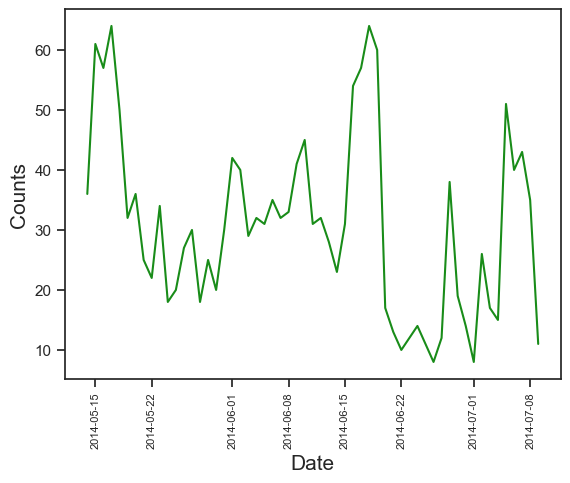

In [159]:
#MatPlotLib
plt.plot(countdata.index, countdata.iloc[:,0], color = 'green', alpha = 0.9)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Counts', fontsize=15)


# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=90, fontsize=8)

plt.show()

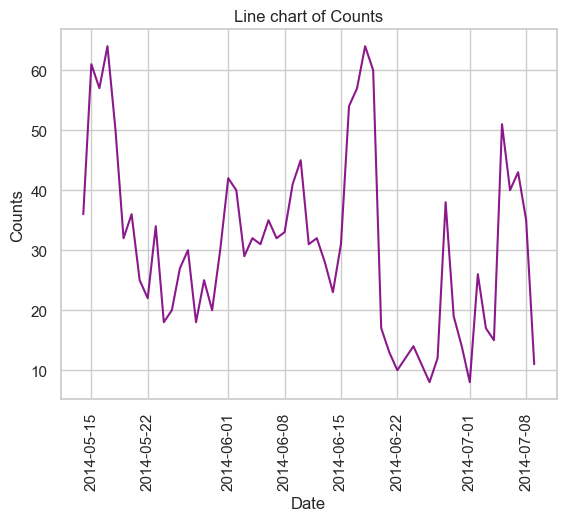

In [199]:
# Seaborn

sns.set_theme(style="whitegrid")
# Plot the responses for different events and regions
ax = sns.lineplot(x=countdata.index, y= countdata.iloc[:,0],data=countdata, alpha = 0.9, color = 'purple')
ax.set_title("Line chart of Counts")
ax.set_ylabel('Counts')
ax.set_xlabel('Date')
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

# Pie Charts

## Q6: draw a pie chart for cities.
## Please style the chart to make it look nicer. 

In [241]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()
cities.iloc[:20]

113


city
Barcelona                         632
Lisbon                            158
Tübingen                          131
Prague                             97
Istanbul                           94
Athens                             67
Krakow                             58
Porto                              58
Freiburg                           54
Kotor                              51
Ohrid                              34
Prizren                            30
Berat                              27
Kraków-Śródmieście                 26
Split                              23
Sarajevo                           15
Belgrade                           14
Kutna Hora                         12
Sintra                             12
Vila Nova de Gaia Municipality      9
Name: count, dtype: int64

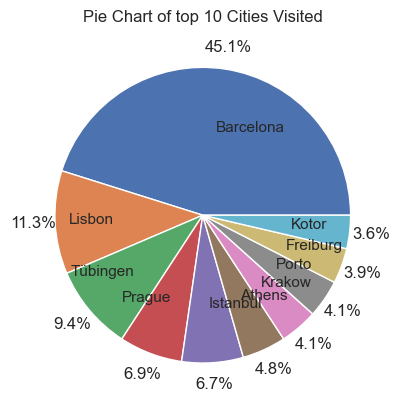

In [261]:
fig, ax = plt.subplots()
ax.pie(cities.iloc[:10], labels = cities.index[:10], autopct='%1.1f%%', pctdistance=1.15, labeldistance=.6)
ax.set_title("Pie Chart of top 10 Cities Visited")
plt.show()